In [1]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
df = pd.read_csv(os.path.join("Q1_maternal_char_v10.csv"))
df.head()

,Mother_Education,Mother_Weight_Gain,Pre-pregnancy_Diabetes,Pre-pregnancy_Hypertension,Bin_Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI
0,8th grade or less,0 lbs,Yes,Yes,0,36.00,830.00,3.00,24.00,45.20
1,8th grade or less,0 lbs,Yes,Yes,1,39.00,791.00,0.00,23.00,32.40
2,8th grade or less,0 lbs,Yes,Yes,1,36.00,3560.00,20.00,37.00,38.60
3,8th grade or less,0 lbs,Yes,Yes,1,35.17,2890.83,9.33,36.67,37.95
4,8th grade or less,0 lbs,Yes,Yes,1,36.04,3041.73,15.58,38.08,39.78


In [4]:
df1 = df[['Bin_Five_min_APGAR_score_code', 'Mother_Education', 'Mother_Weight_Gain','Pre-pregnancy_Diabetes', 'Pre-pregnancy_Hypertension','Average_Age_Mother_years',
         'Average_Birth_Weight_grams','Average_Prenatal_Visits', 'Average_OE_Gestational_Age_weeks',
         'Average_Pre-pregnancy_BMI']]
df1.head()

,Bin_Five_min_APGAR_score_code,Mother_Education,Mother_Weight_Gain,Pre-pregnancy_Diabetes,Pre-pregnancy_Hypertension,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI
0,0,8th grade or less,0 lbs,Yes,Yes,36.00,830.00,3.00,24.00,45.20
1,1,8th grade or less,0 lbs,Yes,Yes,39.00,791.00,0.00,23.00,32.40
2,1,8th grade or less,0 lbs,Yes,Yes,36.00,3560.00,20.00,37.00,38.60
3,1,8th grade or less,0 lbs,Yes,Yes,35.17,2890.83,9.33,36.67,37.95
4,1,8th grade or less,0 lbs,Yes,Yes,36.04,3041.73,15.58,38.08,39.78


In [5]:
one_hot_df1 = pd.get_dummies(df1, prefix=['Pre-pregnancy_Diabetes','Pre-pregnancy_Hypertension','Mother_Education','Mother_Weight_Gain'])
one_hot_df1.head()

,Bin_Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI,Pre-pregnancy_Diabetes_8th grade or less,Pre-pregnancy_Diabetes_9th through 12th grade with no diploma,"Pre-pregnancy_Diabetes_Associate degree (AA, AS)","Pre-pregnancy_Diabetes_Bachelor's degree (BA, AB, BS)",...,Pre-pregnancy_Hypertension_93 lbs,Pre-pregnancy_Hypertension_94 lbs,Pre-pregnancy_Hypertension_95 lbs,Pre-pregnancy_Hypertension_96 lbs,Pre-pregnancy_Hypertension_97 lbs,Pre-pregnancy_Hypertension_98 or more,Mother_Education_No,Mother_Education_Yes,Mother_Weight_Gain_No,Mother_Weight_Gain_Yes
0,0,36.00,830.00,3.00,24.00,45.20,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,39.00,791.00,0.00,23.00,32.40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,36.00,3560.00,20.00,37.00,38.60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,35.17,2890.83,9.33,36.67,37.95,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,36.04,3041.73,15.58,38.08,39.78,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
one_hot_df1.count()

Bin_Five_min_APGAR_score_code            18592
Average_Age_Mother_years                 18592
Average_Birth_Weight_grams               18592
Average_Prenatal_Visits                  18592
Average_OE_Gestational_Age_weeks         18592
                                         ...  
Pre-pregnancy_Hypertension_98 or more    18592
Mother_Education_No                      18592
Mother_Education_Yes                     18592
Mother_Weight_Gain_No                    18592
Mother_Weight_Gain_Yes                   18592
Length: 117, dtype: int64

In [7]:
X = one_hot_df1.iloc[:, 1:118].values
y = one_hot_df1.iloc[:, 0].values

In [8]:
seed = 27
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
model = XGBClassifier(n_estimators=1000,colsample_bylevel=0.8) 
eval_set = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric=["error","logloss"], eval_set=eval_set, verbose=True) 
print(model)

[0]	validation_0-error:0.23175	validation_0-logloss:0.662089	validation_1-error:0.234134	validation_1-logloss:0.661925
[1]	validation_0-error:0.229292	validation_0-logloss:0.634808	validation_1-error:0.229652	validation_1-logloss:0.635185
[2]	validation_0-error:0.226448	validation_0-logloss:0.610881	validation_1-error:0.225708	validation_1-logloss:0.610907
[3]	validation_0-error:0.225987	validation_0-logloss:0.591638	validation_1-error:0.220868	validation_1-logloss:0.592081
[4]	validation_0-error:0.226602	validation_0-logloss:0.57536	validation_1-error:0.223198	validation_1-logloss:0.576253
[5]	validation_0-error:0.226064	validation_0-logloss:0.561909	validation_1-error:0.223198	validation_1-logloss:0.562473
[6]	validation_0-error:0.226064	validation_0-logloss:0.549094	validation_1-error:0.221226	validation_1-logloss:0.549811
[7]	validation_0-error:0.225296	validation_0-logloss:0.538991	validation_1-error:0.221047	validation_1-logloss:0.540022
[8]	validation_0-error:0.225757	validation

[69]	validation_0-error:0.191256	validation_0-logloss:0.415269	validation_1-error:0.196307	validation_1-logloss:0.42592
[70]	validation_0-error:0.190641	validation_0-logloss:0.414922	validation_1-error:0.196486	validation_1-logloss:0.425829
[71]	validation_0-error:0.191025	validation_0-logloss:0.414639	validation_1-error:0.196128	validation_1-logloss:0.425642
[72]	validation_0-error:0.190718	validation_0-logloss:0.41429	validation_1-error:0.195948	validation_1-logloss:0.425437
[73]	validation_0-error:0.190257	validation_0-logloss:0.414031	validation_1-error:0.195948	validation_1-logloss:0.425238
[74]	validation_0-error:0.190257	validation_0-logloss:0.413557	validation_1-error:0.195769	validation_1-logloss:0.425004
[75]	validation_0-error:0.190026	validation_0-logloss:0.413287	validation_1-error:0.196128	validation_1-logloss:0.424874
[76]	validation_0-error:0.189488	validation_0-logloss:0.413012	validation_1-error:0.195769	validation_1-logloss:0.42466
[77]	validation_0-error:0.188797	va

[137]	validation_0-error:0.180037	validation_0-logloss:0.393478	validation_1-error:0.190212	validation_1-logloss:0.411827
[138]	validation_0-error:0.180114	validation_0-logloss:0.393255	validation_1-error:0.190212	validation_1-logloss:0.411707
[139]	validation_0-error:0.17996	validation_0-logloss:0.392915	validation_1-error:0.190929	validation_1-logloss:0.411242
[140]	validation_0-error:0.17996	validation_0-logloss:0.392558	validation_1-error:0.19057	validation_1-logloss:0.411184
[141]	validation_0-error:0.179806	validation_0-logloss:0.39237	validation_1-error:0.190391	validation_1-logloss:0.411072
[142]	validation_0-error:0.179883	validation_0-logloss:0.39217	validation_1-error:0.190212	validation_1-logloss:0.410929
[143]	validation_0-error:0.179653	validation_0-logloss:0.391965	validation_1-error:0.190391	validation_1-logloss:0.41094
[144]	validation_0-error:0.179576	validation_0-logloss:0.391776	validation_1-error:0.190749	validation_1-logloss:0.410957
[145]	validation_0-error:0.179

[205]	validation_0-error:0.17097	validation_0-logloss:0.377331	validation_1-error:0.187164	validation_1-logloss:0.402996
[206]	validation_0-error:0.1712	validation_0-logloss:0.377184	validation_1-error:0.186626	validation_1-logloss:0.402939
[207]	validation_0-error:0.17097	validation_0-logloss:0.377067	validation_1-error:0.187164	validation_1-logloss:0.402916
[208]	validation_0-error:0.170893	validation_0-logloss:0.376955	validation_1-error:0.186805	validation_1-logloss:0.40286
[209]	validation_0-error:0.17097	validation_0-logloss:0.376784	validation_1-error:0.186447	validation_1-logloss:0.40275
[210]	validation_0-error:0.170432	validation_0-logloss:0.376476	validation_1-error:0.187164	validation_1-logloss:0.402571
[211]	validation_0-error:0.170355	validation_0-logloss:0.376315	validation_1-error:0.187522	validation_1-logloss:0.4025
[212]	validation_0-error:0.170355	validation_0-logloss:0.376208	validation_1-error:0.187343	validation_1-logloss:0.402462
[213]	validation_0-error:0.170278

[273]	validation_0-error:0.16367	validation_0-logloss:0.363714	validation_1-error:0.183578	validation_1-logloss:0.395693
[274]	validation_0-error:0.163286	validation_0-logloss:0.363563	validation_1-error:0.183578	validation_1-logloss:0.395669
[275]	validation_0-error:0.163209	validation_0-logloss:0.363457	validation_1-error:0.18322	validation_1-logloss:0.395593
[276]	validation_0-error:0.162978	validation_0-logloss:0.363327	validation_1-error:0.182682	validation_1-logloss:0.395532
[277]	validation_0-error:0.163209	validation_0-logloss:0.363162	validation_1-error:0.183399	validation_1-logloss:0.395508
[278]	validation_0-error:0.163286	validation_0-logloss:0.363037	validation_1-error:0.183399	validation_1-logloss:0.395542
[279]	validation_0-error:0.163132	validation_0-logloss:0.362831	validation_1-error:0.183041	validation_1-logloss:0.395476
[280]	validation_0-error:0.162901	validation_0-logloss:0.362715	validation_1-error:0.183578	validation_1-logloss:0.395452
[281]	validation_0-error:0

[341]	validation_0-error:0.157523	validation_0-logloss:0.353116	validation_1-error:0.18071	validation_1-logloss:0.390859
[342]	validation_0-error:0.157523	validation_0-logloss:0.353032	validation_1-error:0.18071	validation_1-logloss:0.390788
[343]	validation_0-error:0.157369	validation_0-logloss:0.35278	validation_1-error:0.18071	validation_1-logloss:0.390677
[344]	validation_0-error:0.157215	validation_0-logloss:0.352689	validation_1-error:0.180531	validation_1-logloss:0.390647
[345]	validation_0-error:0.157215	validation_0-logloss:0.35254	validation_1-error:0.180531	validation_1-logloss:0.39064
[346]	validation_0-error:0.157292	validation_0-logloss:0.352423	validation_1-error:0.179814	validation_1-logloss:0.390623
[347]	validation_0-error:0.157369	validation_0-logloss:0.352298	validation_1-error:0.179993	validation_1-logloss:0.390644
[348]	validation_0-error:0.157369	validation_0-logloss:0.352156	validation_1-error:0.180351	validation_1-logloss:0.390628
[349]	validation_0-error:0.157

[409]	validation_0-error:0.152144	validation_0-logloss:0.342598	validation_1-error:0.178917	validation_1-logloss:0.386192
[410]	validation_0-error:0.152298	validation_0-logloss:0.342493	validation_1-error:0.179455	validation_1-logloss:0.386121
[411]	validation_0-error:0.152144	validation_0-logloss:0.342366	validation_1-error:0.178917	validation_1-logloss:0.386006
[412]	validation_0-error:0.152298	validation_0-logloss:0.342286	validation_1-error:0.178917	validation_1-logloss:0.385907
[413]	validation_0-error:0.151913	validation_0-logloss:0.342142	validation_1-error:0.179276	validation_1-logloss:0.385859
[414]	validation_0-error:0.151913	validation_0-logloss:0.342031	validation_1-error:0.179455	validation_1-logloss:0.385843
[415]	validation_0-error:0.15199	validation_0-logloss:0.341897	validation_1-error:0.178917	validation_1-logloss:0.385759
[416]	validation_0-error:0.151683	validation_0-logloss:0.341647	validation_1-error:0.179634	validation_1-logloss:0.385592
[417]	validation_0-error:

[477]	validation_0-error:0.146458	validation_0-logloss:0.334051	validation_1-error:0.176228	validation_1-logloss:0.382405
[478]	validation_0-error:0.146688	validation_0-logloss:0.334003	validation_1-error:0.17569	validation_1-logloss:0.382402
[479]	validation_0-error:0.146765	validation_0-logloss:0.333914	validation_1-error:0.17569	validation_1-logloss:0.382403
[480]	validation_0-error:0.146535	validation_0-logloss:0.333806	validation_1-error:0.175869	validation_1-logloss:0.382425
[481]	validation_0-error:0.146535	validation_0-logloss:0.333737	validation_1-error:0.175511	validation_1-logloss:0.382393
[482]	validation_0-error:0.146073	validation_0-logloss:0.333588	validation_1-error:0.17569	validation_1-logloss:0.382265
[483]	validation_0-error:0.146073	validation_0-logloss:0.333454	validation_1-error:0.176049	validation_1-logloss:0.382191
[484]	validation_0-error:0.146073	validation_0-logloss:0.33334	validation_1-error:0.176587	validation_1-logloss:0.382109
[485]	validation_0-error:0.1

[545]	validation_0-error:0.14154	validation_0-logloss:0.325632	validation_1-error:0.17569	validation_1-logloss:0.378998
[546]	validation_0-error:0.141694	validation_0-logloss:0.325499	validation_1-error:0.175511	validation_1-logloss:0.378978
[547]	validation_0-error:0.141156	validation_0-logloss:0.3254	validation_1-error:0.174794	validation_1-logloss:0.378989
[548]	validation_0-error:0.141079	validation_0-logloss:0.325282	validation_1-error:0.175152	validation_1-logloss:0.378922
[549]	validation_0-error:0.141002	validation_0-logloss:0.325212	validation_1-error:0.174794	validation_1-logloss:0.37885
[550]	validation_0-error:0.140848	validation_0-logloss:0.325079	validation_1-error:0.175332	validation_1-logloss:0.378804
[551]	validation_0-error:0.140925	validation_0-logloss:0.324924	validation_1-error:0.175332	validation_1-logloss:0.378742
[552]	validation_0-error:0.140925	validation_0-logloss:0.324867	validation_1-error:0.17569	validation_1-logloss:0.378727
[553]	validation_0-error:0.140

[613]	validation_0-error:0.137621	validation_0-logloss:0.318656	validation_1-error:0.174077	validation_1-logloss:0.376463
[614]	validation_0-error:0.137621	validation_0-logloss:0.31856	validation_1-error:0.174077	validation_1-logloss:0.376386
[615]	validation_0-error:0.137698	validation_0-logloss:0.318525	validation_1-error:0.173897	validation_1-logloss:0.376392
[616]	validation_0-error:0.137621	validation_0-logloss:0.318372	validation_1-error:0.174077	validation_1-logloss:0.376205
[617]	validation_0-error:0.137391	validation_0-logloss:0.318222	validation_1-error:0.174435	validation_1-logloss:0.376255
[618]	validation_0-error:0.137314	validation_0-logloss:0.318105	validation_1-error:0.174077	validation_1-logloss:0.376211
[619]	validation_0-error:0.137391	validation_0-logloss:0.317991	validation_1-error:0.173897	validation_1-logloss:0.376198
[620]	validation_0-error:0.13716	validation_0-logloss:0.317925	validation_1-error:0.173897	validation_1-logloss:0.376198
[621]	validation_0-error:0

[681]	validation_0-error:0.134163	validation_0-logloss:0.312181	validation_1-error:0.171208	validation_1-logloss:0.373503
[682]	validation_0-error:0.134163	validation_0-logloss:0.31214	validation_1-error:0.171208	validation_1-logloss:0.373529
[683]	validation_0-error:0.133625	validation_0-logloss:0.311993	validation_1-error:0.17085	validation_1-logloss:0.373473
[684]	validation_0-error:0.133779	validation_0-logloss:0.311731	validation_1-error:0.171208	validation_1-logloss:0.373325
[685]	validation_0-error:0.133241	validation_0-logloss:0.31156	validation_1-error:0.171567	validation_1-logloss:0.373342
[686]	validation_0-error:0.133241	validation_0-logloss:0.311521	validation_1-error:0.171567	validation_1-logloss:0.373358
[687]	validation_0-error:0.133472	validation_0-logloss:0.311449	validation_1-error:0.171567	validation_1-logloss:0.373371
[688]	validation_0-error:0.133318	validation_0-logloss:0.311365	validation_1-error:0.171925	validation_1-logloss:0.373391
[689]	validation_0-error:0.

[749]	validation_0-error:0.130859	validation_0-logloss:0.305421	validation_1-error:0.17067	validation_1-logloss:0.371107
[750]	validation_0-error:0.130782	validation_0-logloss:0.305336	validation_1-error:0.17085	validation_1-logloss:0.371036
[751]	validation_0-error:0.130629	validation_0-logloss:0.305297	validation_1-error:0.17085	validation_1-logloss:0.37104
[752]	validation_0-error:0.130552	validation_0-logloss:0.305242	validation_1-error:0.171029	validation_1-logloss:0.371022
[753]	validation_0-error:0.130936	validation_0-logloss:0.305167	validation_1-error:0.17067	validation_1-logloss:0.370953
[754]	validation_0-error:0.130936	validation_0-logloss:0.30512	validation_1-error:0.17067	validation_1-logloss:0.37096
[755]	validation_0-error:0.13109	validation_0-logloss:0.305049	validation_1-error:0.171746	validation_1-logloss:0.37099
[756]	validation_0-error:0.131551	validation_0-logloss:0.304919	validation_1-error:0.171925	validation_1-logloss:0.370971
[757]	validation_0-error:0.131474	

[817]	validation_0-error:0.12671	validation_0-logloss:0.299124	validation_1-error:0.170133	validation_1-logloss:0.369358
[818]	validation_0-error:0.126633	validation_0-logloss:0.298954	validation_1-error:0.169953	validation_1-logloss:0.369284
[819]	validation_0-error:0.12671	validation_0-logloss:0.29892	validation_1-error:0.169953	validation_1-logloss:0.369247
[820]	validation_0-error:0.126787	validation_0-logloss:0.29889	validation_1-error:0.169953	validation_1-logloss:0.369239
[821]	validation_0-error:0.126633	validation_0-logloss:0.298852	validation_1-error:0.169953	validation_1-logloss:0.369262
[822]	validation_0-error:0.126633	validation_0-logloss:0.298752	validation_1-error:0.170133	validation_1-logloss:0.369265
[823]	validation_0-error:0.126479	validation_0-logloss:0.298613	validation_1-error:0.170133	validation_1-logloss:0.369162
[824]	validation_0-error:0.126479	validation_0-logloss:0.298521	validation_1-error:0.170133	validation_1-logloss:0.369106
[825]	validation_0-error:0.1

[885]	validation_0-error:0.12256	validation_0-logloss:0.292764	validation_1-error:0.171029	validation_1-logloss:0.366883
[886]	validation_0-error:0.12233	validation_0-logloss:0.292723	validation_1-error:0.171029	validation_1-logloss:0.366902
[887]	validation_0-error:0.122407	validation_0-logloss:0.292679	validation_1-error:0.171029	validation_1-logloss:0.366872
[888]	validation_0-error:0.12233	validation_0-logloss:0.292587	validation_1-error:0.171208	validation_1-logloss:0.36683
[889]	validation_0-error:0.122099	validation_0-logloss:0.292442	validation_1-error:0.171208	validation_1-logloss:0.366781
[890]	validation_0-error:0.121946	validation_0-logloss:0.292361	validation_1-error:0.171208	validation_1-logloss:0.366791
[891]	validation_0-error:0.121946	validation_0-logloss:0.292329	validation_1-error:0.171029	validation_1-logloss:0.366777
[892]	validation_0-error:0.121946	validation_0-logloss:0.292211	validation_1-error:0.170312	validation_1-logloss:0.366772
[893]	validation_0-error:0.1

[953]	validation_0-error:0.118872	validation_0-logloss:0.288167	validation_1-error:0.169236	validation_1-logloss:0.366192
[954]	validation_0-error:0.118872	validation_0-logloss:0.288144	validation_1-error:0.169236	validation_1-logloss:0.36619
[955]	validation_0-error:0.118795	validation_0-logloss:0.288089	validation_1-error:0.169236	validation_1-logloss:0.366195
[956]	validation_0-error:0.118872	validation_0-logloss:0.287991	validation_1-error:0.169416	validation_1-logloss:0.366312
[957]	validation_0-error:0.118795	validation_0-logloss:0.28789	validation_1-error:0.169595	validation_1-logloss:0.36629
[958]	validation_0-error:0.118565	validation_0-logloss:0.287769	validation_1-error:0.169595	validation_1-logloss:0.366225
[959]	validation_0-error:0.118641	validation_0-logloss:0.287748	validation_1-error:0.169595	validation_1-logloss:0.366237
[960]	validation_0-error:0.118488	validation_0-logloss:0.287659	validation_1-error:0.169595	validation_1-logloss:0.366229
[961]	validation_0-error:0.

In [12]:
y_pred = model.predict(X_test)
predictions =[round(value) for value in y_pred]

In [13]:
#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100))

Accuracy: 83.08%


In [14]:
#retrieve performance metrics
results =model.evals_result()
epochs=len(results['validation_0']['error'])
x_axis =range(0,epochs)

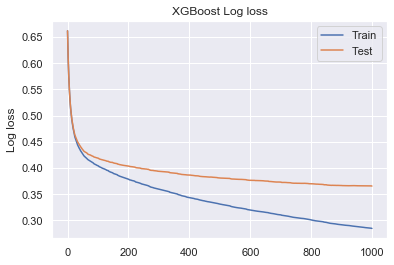

In [15]:
#plot log loss
fig,ax=plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log loss')
plt.title('XGBoost Log loss')
plt.show()

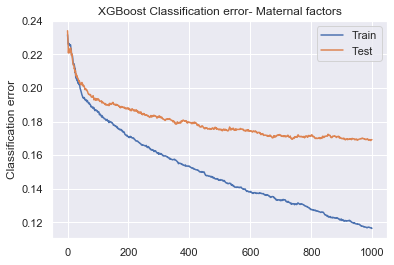

In [26]:
#plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification error')
plt.title('XGBoost Classification error- Maternal factors')
plt.show()
fig.savefig('Q1_errorplot.png')

In [28]:
#avoid overfitting model
model = XGBClassifier(n_estimators=740, colsample_bylevel=0.8) 

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.234134
[1]	validation_0-error:0.229652
[2]	validation_0-error:0.225708
[3]	validation_0-error:0.220868
[4]	validation_0-error:0.223198
[5]	validation_0-error:0.223198
[6]	validation_0-error:0.221226
[7]	validation_0-error:0.221047
[8]	validation_0-error:0.22266
[9]	validation_0-error:0.223019
[10]	validation_0-error:0.223915
[11]	validation_0-error:0.22266
[12]	validation_0-error:0.222302
[13]	validation_0-error:0.219433
[14]	validation_0-error:0.22033
[15]	validation_0-error:0.218716
[16]	validation_0-error:0.217641
[17]	validation_0-error:0.216027
[18]	validation_0-error:0.214234
[19]	validation_0-error:0.213697
[20]	validation_0-error:0.213697
[21]	validation_0-error:0.213697
[22]	validation_0-error:0.211545
[23]	validation_0-error:0.211904
[24]	validation_0-error:0.209573
[25]	validation_0-error:0.209932
[26]	validation_0-error:0.21029
[27]	validation_0-error:0.207422
[28]	validation_0-error:0.208318
[29]	validation_0-error:0.208139
[30]	validation_0-error:

[245]	validation_0-error:0.184654
[246]	validation_0-error:0.184116
[247]	validation_0-error:0.184116
[248]	validation_0-error:0.184475
[249]	validation_0-error:0.184475
[250]	validation_0-error:0.184833
[251]	validation_0-error:0.184475
[252]	validation_0-error:0.184654
[253]	validation_0-error:0.184116
[254]	validation_0-error:0.183758
[255]	validation_0-error:0.183758
[256]	validation_0-error:0.183758
[257]	validation_0-error:0.183937
[258]	validation_0-error:0.183937
[259]	validation_0-error:0.183758
[260]	validation_0-error:0.183937
[261]	validation_0-error:0.183758
[262]	validation_0-error:0.183399
[263]	validation_0-error:0.183578
[264]	validation_0-error:0.183578
[265]	validation_0-error:0.18322
[266]	validation_0-error:0.18322
[267]	validation_0-error:0.182861
[268]	validation_0-error:0.182861
[269]	validation_0-error:0.182682
[270]	validation_0-error:0.182503
[271]	validation_0-error:0.182682
[272]	validation_0-error:0.18322
[273]	validation_0-error:0.183578
[274]	validation_

[487]	validation_0-error:0.176049
[488]	validation_0-error:0.17569
[489]	validation_0-error:0.176228
[490]	validation_0-error:0.175511
[491]	validation_0-error:0.17569
[492]	validation_0-error:0.17569
[493]	validation_0-error:0.17569
[494]	validation_0-error:0.175511
[495]	validation_0-error:0.175332
[496]	validation_0-error:0.175152
[497]	validation_0-error:0.175332
[498]	validation_0-error:0.175332
[499]	validation_0-error:0.175511
[500]	validation_0-error:0.175152
[501]	validation_0-error:0.175332
[502]	validation_0-error:0.175152
[503]	validation_0-error:0.175332
[504]	validation_0-error:0.175332
[505]	validation_0-error:0.175332
[506]	validation_0-error:0.174794
[507]	validation_0-error:0.174615
[508]	validation_0-error:0.174794
[509]	validation_0-error:0.174615
[510]	validation_0-error:0.174973
[511]	validation_0-error:0.175332
[512]	validation_0-error:0.175511
[513]	validation_0-error:0.175511
[514]	validation_0-error:0.175332
[515]	validation_0-error:0.174794
[516]	validation_0

[729]	validation_0-error:0.17067
[730]	validation_0-error:0.17085
[731]	validation_0-error:0.171388
[732]	validation_0-error:0.170312
[733]	validation_0-error:0.170312
[734]	validation_0-error:0.169953
[735]	validation_0-error:0.169774
[736]	validation_0-error:0.169953
[737]	validation_0-error:0.169595
[738]	validation_0-error:0.169953
[739]	validation_0-error:0.169774
Accuracy: 83.02%
